<a href="https://colab.research.google.com/github/chitwan6804/Data_mining/blob/main/Clustering_kMeans_%26_Heirarchial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Example 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

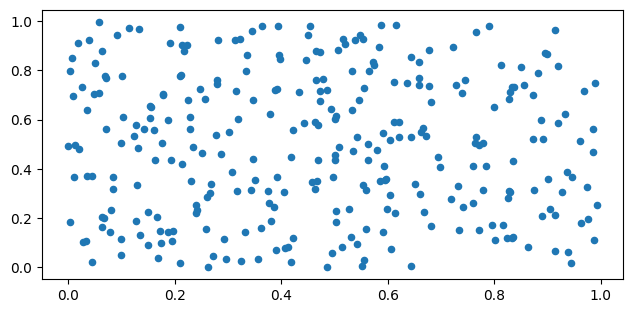

In [ ]:
X = np.random.rand(300,2)

plt.figure(figsize=(7.5, 3.5))
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,max_iter=100)

In [ ]:
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3)

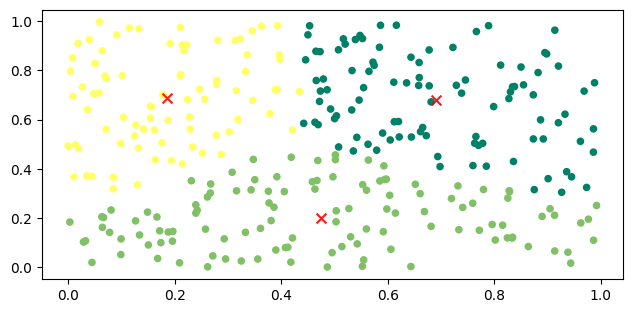

In [ ]:
plt.figure(figsize=(7.5,3.5))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,s=20,cmap='summer')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',c='r',s=50,alpha=0.9)
plt.show()

## Example 2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=400,centers=4,cluster_std=0.6,random_state=0)

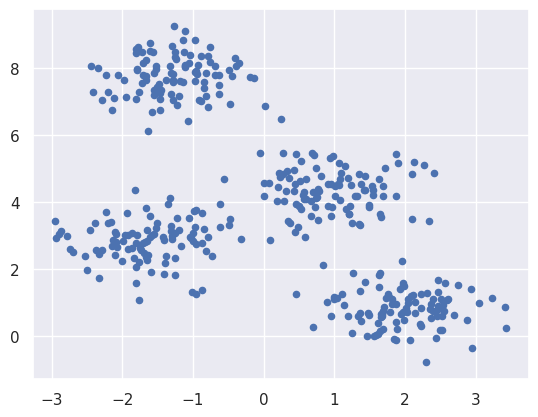

In [ ]:
plt.scatter(X[:,0],X[:,1],s=20);
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

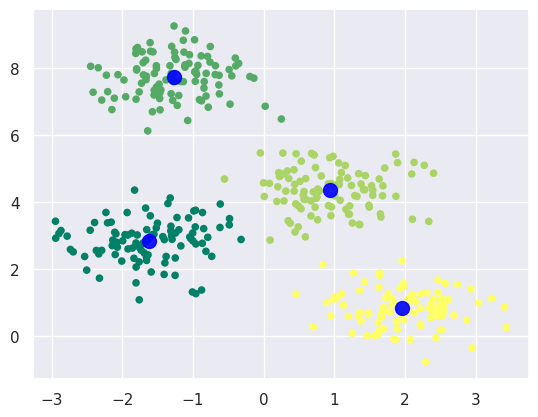

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=20,cmap='summer')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='blue',s=100,alpha=0.9)
plt.show()

##Example 3

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [ ]:
kmeans=KMeans(n_clusters=10,random_state=0)
clusters=kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

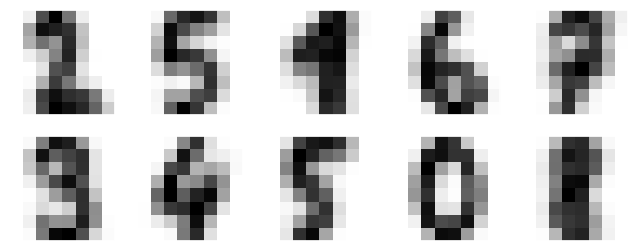

In [ ]:
fig,ax=plt.subplots(2,5,figsize=(8,3))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
  axi.set(xticks=[],yticks=[])
  axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

#Hierarchical Clustering

##Example 1

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

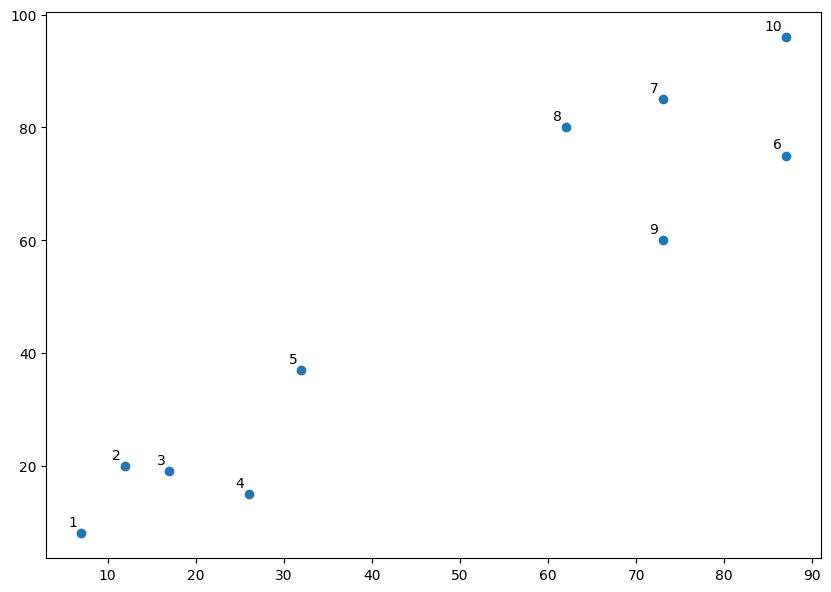

In [ ]:
X=np.array([[7,8],[12,20],[17,19],[26,15],[32,37],[87,75],[73,85],[62,80],[73,60],[87,96],])
labels=range(1,11)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1],label='True Position')

for label,x,y in zip(labels,X[:,0],X[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(-3,3),textcoords='offset points',ha='right',va='bottom')
plt.show()

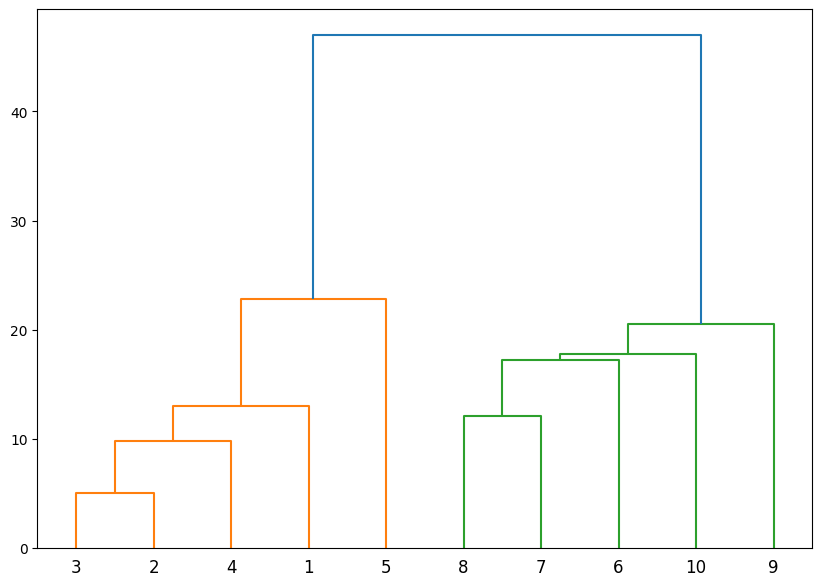

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt
linked=linkage(X,'single')
labelList=range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')

cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

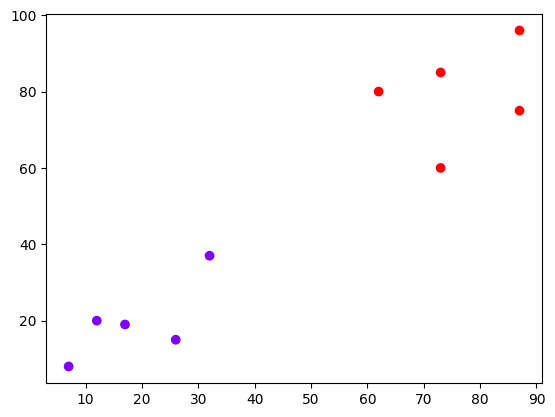

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

##Example 2

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
import pandas as pd
import os

file_path=os.path.join(path,'diabetes.csv')
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(file_path, names=headernames, header=None, skiprows=1)
array=data.values
X=array[:,0:8]
Y=array[:,8]

array([0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 2, 1,
       0, 0, 0, 2, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       2, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 3, 2, 2, 0, 0,

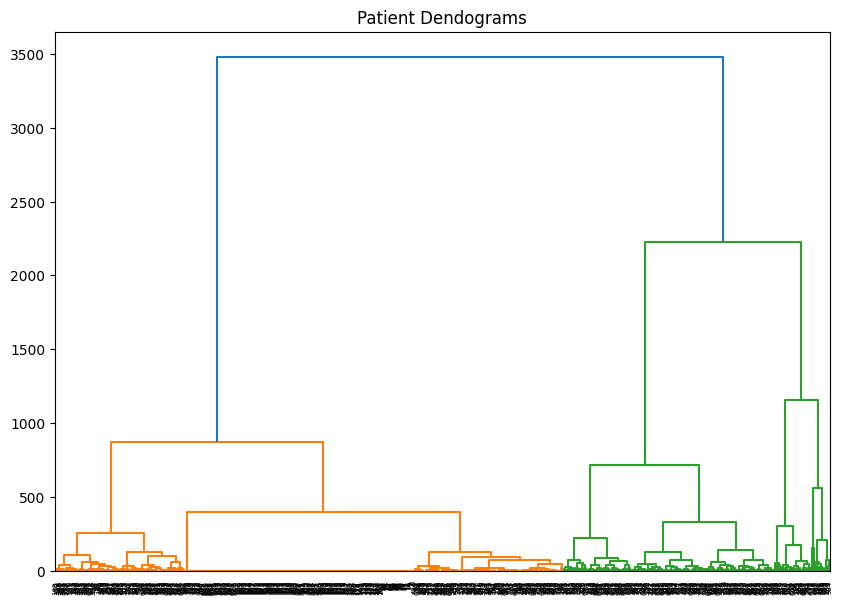

In [ ]:
patient_data = data.iloc[:, 3:5].values
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Patient Dendograms")

dend = shc.dendrogram(shc.linkage(patient_data, method='ward'))

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
cluster.fit_predict(patient_data)

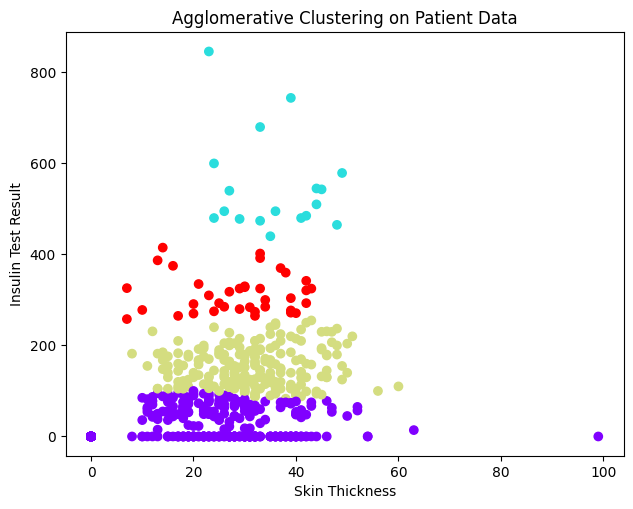

In [ ]:
plt.figure(figsize=(7.2, 5.5))
plt.title("Agglomerative Clustering on Patient Data")
plt.xlabel("Skin Thickness")
plt.ylabel("Insulin Test Result")
plt.scatter(patient_data[:, 0], patient_data[:, 1], c=cluster.labels_, cmap='rainbow')
